In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((73*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.3,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(306, 100, 100)


In [17]:
print(y_test.shape)

(132, 100, 100)


In [18]:
print(x_train.shape)

(306, 15, 1)


In [19]:
print(x_test.shape)

(132, 15, 1)


In [20]:
theta_train.shape

(306,)

In [21]:
tsr_train.shape

(306,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayerSensor')(x_)
output_image = tf.keras.layers.Reshape((100,100))(output_data)
# MLP
sd = tf.keras.Model(input_time, output_image)

In [24]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
           loss = tf.keras.losses.MeanSquaredError(),
           metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((306, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((132, 2, 1))

In [28]:
tsr_theta_train.shape

(306, 2, 1)

In [29]:
start = datetime.datetime.now()
history = sd.fit(tsr_theta_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
8/8 [==============================] - 1s 6ms/step - loss: 0.0110 - rmse: 0.1043
Epoch 2/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.1029
Epoch 3/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0103 - rmse: 0.1008
Epoch 4/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0095 - rmse: 0.0966
Epoch 5/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0083 - rmse: 0.0904
Epoch 6/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0076 - rmse: 0.0864
Epoch 7/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0844
Epoch 8/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0841
Epoch 9/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0840
Epoch 10/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0839
Epoch 11/10000
8/8 [=============================

8/8 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0802
Epoch 87/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0801
Epoch 88/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0801
Epoch 89/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 90/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 91/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 92/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 93/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0798
Epoch 94/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0798
Epoch 95/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0797
Epoch 96/10000
8/8 [==============================] - 0

8/8 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0760
Epoch 171/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0759
Epoch 172/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0759
Epoch 173/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0058 - rmse: 0.0756
Epoch 174/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0756
Epoch 175/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0754
Epoch 176/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0754
Epoch 177/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0753
Epoch 178/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0058 - rmse: 0.0752
Epoch 179/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0752
Epoch 180/10000
8/8 [=========================

8/8 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0697
Epoch 255/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0049 - rmse: 0.0695
Epoch 256/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0696
Epoch 257/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0693
Epoch 258/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0692
Epoch 259/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0049 - rmse: 0.0691
Epoch 260/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0689
Epoch 261/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0688
Epoch 262/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0688
Epoch 263/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0687
Epoch 264/10000
8/8 [=========================

8/8 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0564
Epoch 339/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0561
Epoch 340/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0559
Epoch 341/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0562
Epoch 342/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0560
Epoch 343/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0557
Epoch 344/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0553
Epoch 345/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0552
Epoch 346/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0549
Epoch 347/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0548
Epoch 348/10000
8/8 [=========================

8/8 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0431
Epoch 423/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0430
Epoch 424/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0430
Epoch 425/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 426/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 427/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 428/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0425
Epoch 429/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0423
Epoch 430/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0421
Epoch 431/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0420
Epoch 432/10000
8/8 [=========================

8/8 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0344
Epoch 507/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0344
Epoch 508/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0342
Epoch 509/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0342
Epoch 510/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0341
Epoch 511/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0341
Epoch 512/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0340
Epoch 513/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0340
Epoch 514/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0339
Epoch 515/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0337
Epoch 516/10000
8/8 [=========================

8/8 [==============================] - 0s 5ms/step - loss: 9.4490e-04 - rmse: 0.0290
Epoch 590/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.3597e-04 - rmse: 0.0288
Epoch 591/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.3231e-04 - rmse: 0.0288
Epoch 592/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.2793e-04 - rmse: 0.0287
Epoch 593/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.2059e-04 - rmse: 0.0286
Epoch 594/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0987e-04 - rmse: 0.0284
Epoch 595/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0940e-04 - rmse: 0.0284
Epoch 596/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0561e-04 - rmse: 0.0283
Epoch 597/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0298e-04 - rmse: 0.0283
Epoch 598/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0385e-04 - rmse: 0.0283
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 7.2079e-04 - rmse: 0.0249
Epoch 671/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1204e-04 - rmse: 0.0247
Epoch 672/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1847e-04 - rmse: 0.0248
Epoch 673/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.0896e-04 - rmse: 0.0246
Epoch 674/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.0685e-04 - rmse: 0.0246
Epoch 675/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1079e-04 - rmse: 0.0247
Epoch 676/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.0143e-04 - rmse: 0.0245
Epoch 677/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.0003e-04 - rmse: 0.0245
Epoch 678/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2104e-04 - rmse: 0.0249
Epoch 679/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1990e-04 - rmse: 0.0249
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 5.7979e-04 - rmse: 0.0219
Epoch 752/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.7789e-04 - rmse: 0.0219
Epoch 753/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.7928e-04 - rmse: 0.0219
Epoch 754/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.7522e-04 - rmse: 0.0218
Epoch 755/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.6787e-04 - rmse: 0.0216
Epoch 756/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.6842e-04 - rmse: 0.0216
Epoch 757/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.6314e-04 - rmse: 0.0215
Epoch 758/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.7191e-04 - rmse: 0.0217
Epoch 759/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.6527e-04 - rmse: 0.0216
Epoch 760/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.5881e-04 - rmse: 0.0214
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 4.9497e-04 - rmse: 0.0199
Epoch 833/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8990e-04 - rmse: 0.0198
Epoch 834/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8054e-04 - rmse: 0.0195
Epoch 835/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.7979e-04 - rmse: 0.0195
Epoch 836/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.7387e-04 - rmse: 0.0194
Epoch 837/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.7380e-04 - rmse: 0.0194
Epoch 838/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.7221e-04 - rmse: 0.0193
Epoch 839/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.6972e-04 - rmse: 0.0193
Epoch 840/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.6775e-04 - rmse: 0.0192
Epoch 841/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.7100e-04 - rmse: 0.0193
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 4.0164e-04 - rmse: 0.0174
Epoch 914/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0267e-04 - rmse: 0.0175
Epoch 915/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0030e-04 - rmse: 0.0174
Epoch 916/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9917e-04 - rmse: 0.0174
Epoch 917/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0065e-04 - rmse: 0.0174
Epoch 918/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0790e-04 - rmse: 0.0176
Epoch 919/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0732e-04 - rmse: 0.0176
Epoch 920/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9884e-04 - rmse: 0.0174
Epoch 921/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9452e-04 - rmse: 0.0172
Epoch 922/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9288e-04 - rmse: 0.0172
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 3.4843e-04 - rmse: 0.0159
Epoch 995/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4791e-04 - rmse: 0.0159
Epoch 996/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.5056e-04 - rmse: 0.0159
Epoch 997/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5346e-04 - rmse: 0.0160
Epoch 998/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4803e-04 - rmse: 0.0159
Epoch 999/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4642e-04 - rmse: 0.0158
Epoch 1000/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4566e-04 - rmse: 0.0158
Epoch 1001/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4893e-04 - rmse: 0.0159
Epoch 1002/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.5429e-04 - rmse: 0.0161
Epoch 1003/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4827e-04 - rmse: 0.0159
Ep

8/8 [==============================] - 0s 6ms/step - loss: 3.0888e-04 - rmse: 0.0146
Epoch 1075/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.0833e-04 - rmse: 0.0146
Epoch 1076/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0671e-04 - rmse: 0.0145
Epoch 1077/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1520e-04 - rmse: 0.0148
Epoch 1078/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1704e-04 - rmse: 0.0149
Epoch 1079/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.1945e-04 - rmse: 0.0150
Epoch 1080/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.1842e-04 - rmse: 0.0149
Epoch 1081/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.1573e-04 - rmse: 0.0148
Epoch 1082/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.0995e-04 - rmse: 0.0146
Epoch 1083/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.0374e-04 - rmse: 0.01

8/8 [==============================] - 0s 5ms/step - loss: 2.8301e-04 - rmse: 0.0137
Epoch 1155/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8671e-04 - rmse: 0.0138
Epoch 1156/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9227e-04 - rmse: 0.0140
Epoch 1157/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8792e-04 - rmse: 0.0139
Epoch 1158/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8277e-04 - rmse: 0.0137
Epoch 1159/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8009e-04 - rmse: 0.0136
Epoch 1160/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8828e-04 - rmse: 0.0139
Epoch 1161/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8065e-04 - rmse: 0.0136
Epoch 1162/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7588e-04 - rmse: 0.0135
Epoch 1163/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7189e-04 - rmse: 0.01

8/8 [==============================] - 0s 5ms/step - loss: 2.5585e-04 - rmse: 0.0127
Epoch 1235/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5364e-04 - rmse: 0.0126
Epoch 1236/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5880e-04 - rmse: 0.0128
Epoch 1237/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5949e-04 - rmse: 0.0129
Epoch 1238/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6805e-04 - rmse: 0.0132
Epoch 1239/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7054e-04 - rmse: 0.0133
Epoch 1240/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6437e-04 - rmse: 0.0130
Epoch 1241/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6044e-04 - rmse: 0.0129
Epoch 1242/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5726e-04 - rmse: 0.0128
Epoch 1243/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5214e-04 - rmse: 0.01

8/8 [==============================] - 0s 6ms/step - loss: 2.4051e-04 - rmse: 0.0121
Epoch 1315/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3960e-04 - rmse: 0.0121
Epoch 1316/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4851e-04 - rmse: 0.0124
Epoch 1317/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4227e-04 - rmse: 0.0122
Epoch 1318/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4392e-04 - rmse: 0.0123
Epoch 1319/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4518e-04 - rmse: 0.0123
Epoch 1320/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4139e-04 - rmse: 0.0122
Epoch 1321/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3592e-04 - rmse: 0.0119
Epoch 1322/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3413e-04 - rmse: 0.0119
Epoch 1323/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2898e-04 - rmse: 0.01

8/8 [==============================] - 0s 5ms/step - loss: 2.2400e-04 - rmse: 0.0114
Epoch 1395/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2519e-04 - rmse: 0.0115
Epoch 1396/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2010e-04 - rmse: 0.0113
Epoch 1397/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2137e-04 - rmse: 0.0113
Epoch 1398/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2328e-04 - rmse: 0.0114
Epoch 1399/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2375e-04 - rmse: 0.0114
Epoch 1400/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2474e-04 - rmse: 0.0115
Epoch 1401/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2615e-04 - rmse: 0.0115
Epoch 1402/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2054e-04 - rmse: 0.0113
Epoch 1403/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2069e-04 - rmse: 0.01

8/8 [==============================] - 0s 6ms/step - loss: 2.1477e-04 - rmse: 0.0111
Epoch 1475/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2039e-04 - rmse: 0.0113
Epoch 1476/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.0973e-04 - rmse: 0.0108
Epoch 1477/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.1084e-04 - rmse: 0.0109
Epoch 1478/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.1377e-04 - rmse: 0.0110
Epoch 1479/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.1708e-04 - rmse: 0.0112
Epoch 1480/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.1810e-04 - rmse: 0.0112
Epoch 1481/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.1490e-04 - rmse: 0.0111
Epoch 1482/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.1051e-04 - rmse: 0.0109
Epoch 1483/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.0724e-04 - rmse: 0.01

8/8 [==============================] - 0s 5ms/step - loss: 1.9890e-04 - rmse: 0.0104
Epoch 1555/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.0296e-04 - rmse: 0.0105
Epoch 1556/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.0202e-04 - rmse: 0.0105
Epoch 1557/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.9762e-04 - rmse: 0.0103
Epoch 1558/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.9752e-04 - rmse: 0.0103
Epoch 1559/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.0002e-04 - rmse: 0.0104
Epoch 1560/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.9784e-04 - rmse: 0.0103
Epoch 1561/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.9711e-04 - rmse: 0.0103
Epoch 1562/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.0160e-04 - rmse: 0.0105
Epoch 1563/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.0096e-04 - rmse: 0.01

8/8 [==============================] - 0s 6ms/step - loss: 1.8731e-04 - rmse: 0.0098
Epoch 1635/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.9076e-04 - rmse: 0.0100
Epoch 1636/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.0832e-04 - rmse: 0.0108
Epoch 1637/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.0588e-04 - rmse: 0.0107
Epoch 1638/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.0505e-04 - rmse: 0.0107
Epoch 1639/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.0088e-04 - rmse: 0.0105
Epoch 1640/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.9572e-04 - rmse: 0.0102
Epoch 1641/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.9890e-04 - rmse: 0.0104
Epoch 1642/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.9264e-04 - rmse: 0.0101
Epoch 1643/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.9061e-04 - rmse: 0.01

8/8 [==============================] - 0s 5ms/step - loss: 1.8512e-04 - rmse: 0.0097
Epoch 1715/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8371e-04 - rmse: 0.0096
Epoch 1716/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.9130e-04 - rmse: 0.0100
Epoch 1717/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8685e-04 - rmse: 0.0098
Epoch 1718/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8752e-04 - rmse: 0.0098
Epoch 1719/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8444e-04 - rmse: 0.0097
Epoch 1720/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8377e-04 - rmse: 0.0097
Epoch 1721/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8480e-04 - rmse: 0.0097
Epoch 1722/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8572e-04 - rmse: 0.0098
Epoch 1723/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8403e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.9275e-04 - rmse: 0.0101
Epoch 1795/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8410e-04 - rmse: 0.0097
Epoch 1796/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.9032e-04 - rmse: 0.0100
Epoch 1797/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8270e-04 - rmse: 0.0096
Epoch 1798/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8616e-04 - rmse: 0.0098
Epoch 1799/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.8632e-04 - rmse: 0.0098
Epoch 1800/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8179e-04 - rmse: 0.0096
Epoch 1801/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7948e-04 - rmse: 0.0095
Epoch 1802/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8261e-04 - rmse: 0.0096
Epoch 1803/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8649e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.6956e-04 - rmse: 0.0089
Epoch 1875/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7068e-04 - rmse: 0.0090
Epoch 1876/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7570e-04 - rmse: 0.0093
Epoch 1877/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.8432e-04 - rmse: 0.0097
Epoch 1878/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8356e-04 - rmse: 0.0097
Epoch 1879/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8197e-04 - rmse: 0.0096
Epoch 1880/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7326e-04 - rmse: 0.0092
Epoch 1881/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7289e-04 - rmse: 0.0091
Epoch 1882/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6961e-04 - rmse: 0.0090
Epoch 1883/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7121e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.6370e-04 - rmse: 0.0086
Epoch 1955/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6666e-04 - rmse: 0.0088
Epoch 1956/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6980e-04 - rmse: 0.0090
Epoch 1957/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6837e-04 - rmse: 0.0089
Epoch 1958/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6984e-04 - rmse: 0.0090
Epoch 1959/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6896e-04 - rmse: 0.0089
Epoch 1960/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6980e-04 - rmse: 0.0090
Epoch 1961/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6683e-04 - rmse: 0.0088
Epoch 1962/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6402e-04 - rmse: 0.0087
Epoch 1963/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6576e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.7467e-04 - rmse: 0.0093
Epoch 2035/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.8035e-04 - rmse: 0.0096
Epoch 2036/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7790e-04 - rmse: 0.0095
Epoch 2037/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7360e-04 - rmse: 0.0092
Epoch 2038/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6881e-04 - rmse: 0.0090
Epoch 2039/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6543e-04 - rmse: 0.0088
Epoch 2040/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6210e-04 - rmse: 0.0086
Epoch 2041/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6378e-04 - rmse: 0.0087
Epoch 2042/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6667e-04 - rmse: 0.0088
Epoch 2043/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7099e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.7202e-04 - rmse: 0.0092
Epoch 2115/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6636e-04 - rmse: 0.0088
Epoch 2116/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6463e-04 - rmse: 0.0088
Epoch 2117/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7583e-04 - rmse: 0.0094
Epoch 2118/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8031e-04 - rmse: 0.0096
Epoch 2119/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7559e-04 - rmse: 0.0094
Epoch 2120/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7920e-04 - rmse: 0.0095
Epoch 2121/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7606e-04 - rmse: 0.0094
Epoch 2122/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8083e-04 - rmse: 0.0096
Epoch 2123/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7444e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.6706e-04 - rmse: 0.0089
Epoch 2195/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5867e-04 - rmse: 0.0084
Epoch 2196/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6286e-04 - rmse: 0.0087
Epoch 2197/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7302e-04 - rmse: 0.0092
Epoch 2198/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7083e-04 - rmse: 0.0091
Epoch 2199/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6462e-04 - rmse: 0.0088
Epoch 2200/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6264e-04 - rmse: 0.0087
Epoch 2201/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6151e-04 - rmse: 0.0086
Epoch 2202/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.6102e-04 - rmse: 0.0086
Epoch 2203/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.6404e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.6472e-04 - rmse: 0.0088
Epoch 2275/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5900e-04 - rmse: 0.0085
Epoch 2276/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5688e-04 - rmse: 0.0084
Epoch 2277/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5952e-04 - rmse: 0.0085
Epoch 2278/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5217e-04 - rmse: 0.0081
Epoch 2279/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5004e-04 - rmse: 0.0079
Epoch 2280/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5115e-04 - rmse: 0.0080
Epoch 2281/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5178e-04 - rmse: 0.0080
Epoch 2282/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5617e-04 - rmse: 0.0083
Epoch 2283/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5676e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.5071e-04 - rmse: 0.0080
Epoch 2355/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5014e-04 - rmse: 0.0080
Epoch 2356/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5369e-04 - rmse: 0.0082
Epoch 2357/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4827e-04 - rmse: 0.0079
Epoch 2358/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4567e-04 - rmse: 0.0077
Epoch 2359/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4875e-04 - rmse: 0.0079
Epoch 2360/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5604e-04 - rmse: 0.0083
Epoch 2361/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6092e-04 - rmse: 0.0086
Epoch 2362/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5896e-04 - rmse: 0.0085
Epoch 2363/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5878e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.4743e-04 - rmse: 0.0078
Epoch 2435/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.4656e-04 - rmse: 0.0078
Epoch 2436/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.4517e-04 - rmse: 0.0077
Epoch 2437/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.5985e-04 - rmse: 0.0086
Epoch 2438/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5831e-04 - rmse: 0.0085
Epoch 2439/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5818e-04 - rmse: 0.0085
Epoch 2440/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.6096e-04 - rmse: 0.0086
Epoch 2441/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5931e-04 - rmse: 0.0086
Epoch 2442/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6344e-04 - rmse: 0.0088
Epoch 2443/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5609e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.7879e-04 - rmse: 0.0096
Epoch 2515/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7091e-04 - rmse: 0.0092
Epoch 2516/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6184e-04 - rmse: 0.0087
Epoch 2517/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5368e-04 - rmse: 0.0082
Epoch 2518/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5289e-04 - rmse: 0.0082
Epoch 2519/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6685e-04 - rmse: 0.0090
Epoch 2520/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6983e-04 - rmse: 0.0092
Epoch 2521/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6073e-04 - rmse: 0.0087
Epoch 2522/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5688e-04 - rmse: 0.0084
Epoch 2523/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5636e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.4316e-04 - rmse: 0.0076
Epoch 2595/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.4118e-04 - rmse: 0.0075
Epoch 2596/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.4674e-04 - rmse: 0.0078
Epoch 2597/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4588e-04 - rmse: 0.0078
Epoch 2598/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4913e-04 - rmse: 0.0080
Epoch 2599/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4455e-04 - rmse: 0.0077
Epoch 2600/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4687e-04 - rmse: 0.0078
Epoch 2601/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5146e-04 - rmse: 0.0081
Epoch 2602/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4212e-04 - rmse: 0.0075
Epoch 2603/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4489e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.4025e-04 - rmse: 0.0074
Epoch 2675/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4047e-04 - rmse: 0.0075
Epoch 2676/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3879e-04 - rmse: 0.0073
Epoch 2677/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4085e-04 - rmse: 0.0075
Epoch 2678/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4283e-04 - rmse: 0.0076
Epoch 2679/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4207e-04 - rmse: 0.0076
Epoch 2680/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3960e-04 - rmse: 0.0074
Epoch 2681/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4251e-04 - rmse: 0.0076
Epoch 2682/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4478e-04 - rmse: 0.0077
Epoch 2683/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4121e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.3788e-04 - rmse: 0.0073
Epoch 2755/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3931e-04 - rmse: 0.0074
Epoch 2756/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3728e-04 - rmse: 0.0073
Epoch 2757/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3820e-04 - rmse: 0.0073
Epoch 2758/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4204e-04 - rmse: 0.0076
Epoch 2759/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4007e-04 - rmse: 0.0075
Epoch 2760/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3891e-04 - rmse: 0.0074
Epoch 2761/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3406e-04 - rmse: 0.0070
Epoch 2762/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3462e-04 - rmse: 0.0071
Epoch 2763/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.3419e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.3404e-04 - rmse: 0.0071
Epoch 2835/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4105e-04 - rmse: 0.0076
Epoch 2836/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3753e-04 - rmse: 0.0073
Epoch 2837/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3565e-04 - rmse: 0.0072
Epoch 2838/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.3693e-04 - rmse: 0.0073
Epoch 2839/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4546e-04 - rmse: 0.0078
Epoch 2840/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4654e-04 - rmse: 0.0079
Epoch 2841/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4182e-04 - rmse: 0.0076
Epoch 2842/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4975e-04 - rmse: 0.0081
Epoch 2843/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3956e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.3648e-04 - rmse: 0.0073
Epoch 2915/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.3499e-04 - rmse: 0.0072
Epoch 2916/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2875e-04 - rmse: 0.0067
Epoch 2917/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2588e-04 - rmse: 0.0065
Epoch 2918/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3002e-04 - rmse: 0.0068
Epoch 2919/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3320e-04 - rmse: 0.0070
Epoch 2920/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.2876e-04 - rmse: 0.0067
Epoch 2921/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3038e-04 - rmse: 0.0068
Epoch 2922/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2920e-04 - rmse: 0.0068
Epoch 2923/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3036e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.3299e-04 - rmse: 0.0071
Epoch 2995/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3765e-04 - rmse: 0.0074
Epoch 2996/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3746e-04 - rmse: 0.0074
Epoch 2997/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3213e-04 - rmse: 0.0070
Epoch 2998/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3025e-04 - rmse: 0.0069
Epoch 2999/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3177e-04 - rmse: 0.0070
Epoch 3000/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3260e-04 - rmse: 0.0070
Epoch 3001/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2751e-04 - rmse: 0.0067
Epoch 3002/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3126e-04 - rmse: 0.0069
Epoch 3003/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3536e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.2614e-04 - rmse: 0.0066
Epoch 3075/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2242e-04 - rmse: 0.0063
Epoch 3076/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2726e-04 - rmse: 0.0067
Epoch 3077/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.2849e-04 - rmse: 0.0068
Epoch 3078/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3953e-04 - rmse: 0.0075
Epoch 3079/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2987e-04 - rmse: 0.0069
Epoch 3080/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.2708e-04 - rmse: 0.0067
Epoch 3081/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2922e-04 - rmse: 0.0068
Epoch 3082/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2460e-04 - rmse: 0.0065
Epoch 3083/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2136e-04 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 1.2660e-04 - rmse: 0.0067
Epoch 3155/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2576e-04 - rmse: 0.0066
Epoch 3156/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3236e-04 - rmse: 0.0071
Epoch 3157/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2480e-04 - rmse: 0.0065
Epoch 3158/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2734e-04 - rmse: 0.0067
Epoch 3159/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2591e-04 - rmse: 0.0066
Epoch 3160/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2535e-04 - rmse: 0.0066
Epoch 3161/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3030e-04 - rmse: 0.0069
Epoch 3162/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2589e-04 - rmse: 0.0066
Epoch 3163/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2401e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.2195e-04 - rmse: 0.0063
Epoch 3235/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2070e-04 - rmse: 0.0062
Epoch 3236/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2771e-04 - rmse: 0.0068
Epoch 3237/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2600e-04 - rmse: 0.0066
Epoch 3238/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3959e-04 - rmse: 0.0076
Epoch 3239/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3038e-04 - rmse: 0.0070
Epoch 3240/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3245e-04 - rmse: 0.0071
Epoch 3241/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3476e-04 - rmse: 0.0073
Epoch 3242/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4123e-04 - rmse: 0.0077
Epoch 3243/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4536e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.3168e-04 - rmse: 0.0071
Epoch 3315/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2297e-04 - rmse: 0.0064
Epoch 3316/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.1957e-04 - rmse: 0.0062
Epoch 3317/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1585e-04 - rmse: 0.0059
Epoch 3318/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1430e-04 - rmse: 0.0057
Epoch 3319/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1709e-04 - rmse: 0.0060
Epoch 3320/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2672e-04 - rmse: 0.0067
Epoch 3321/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3026e-04 - rmse: 0.0070
Epoch 3322/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.3006e-04 - rmse: 0.0070
Epoch 3323/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.2703e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.2494e-04 - rmse: 0.0066
Epoch 3395/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3764e-04 - rmse: 0.0075
Epoch 3396/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.3835e-04 - rmse: 0.0076
Epoch 3397/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3133e-04 - rmse: 0.0071
Epoch 3398/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2700e-04 - rmse: 0.0068
Epoch 3399/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3329e-04 - rmse: 0.0072
Epoch 3400/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3718e-04 - rmse: 0.0075
Epoch 3401/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.2770e-04 - rmse: 0.0068
Epoch 3402/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.1989e-04 - rmse: 0.0062
Epoch 3403/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1711e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.1367e-04 - rmse: 0.0057
Epoch 3475/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1411e-04 - rmse: 0.0058
Epoch 3476/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1152e-04 - rmse: 0.0056
Epoch 3477/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1434e-04 - rmse: 0.0058
Epoch 3478/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1727e-04 - rmse: 0.0061
Epoch 3479/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1342e-04 - rmse: 0.0057
Epoch 3480/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1467e-04 - rmse: 0.0058
Epoch 3481/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1528e-04 - rmse: 0.0059
Epoch 3482/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1474e-04 - rmse: 0.0058
Epoch 3483/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1461e-04 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 1.1642e-04 - rmse: 0.0060
Epoch 3555/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1353e-04 - rmse: 0.0058
Epoch 3556/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1743e-04 - rmse: 0.0061
Epoch 3557/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1972e-04 - rmse: 0.0063
Epoch 3558/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2156e-04 - rmse: 0.0064
Epoch 3559/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.2073e-04 - rmse: 0.0064
Epoch 3560/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2322e-04 - rmse: 0.0066
Epoch 3561/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2232e-04 - rmse: 0.0065
Epoch 3562/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2420e-04 - rmse: 0.0066
Epoch 3563/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4261e-04 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 1.3488e-04 - rmse: 0.0074
Epoch 3635/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3756e-04 - rmse: 0.0076
Epoch 3636/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3400e-04 - rmse: 0.0074
Epoch 3637/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2838e-04 - rmse: 0.0070
Epoch 3638/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.2365e-04 - rmse: 0.0066
Epoch 3639/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2428e-04 - rmse: 0.0067
Epoch 3640/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2482e-04 - rmse: 0.0067
Epoch 3641/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2810e-04 - rmse: 0.0070
Epoch 3642/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2328e-04 - rmse: 0.0066
Epoch 3643/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1806e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.1744e-04 - rmse: 0.0062
Epoch 3715/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2719e-04 - rmse: 0.0069
Epoch 3716/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.2074e-04 - rmse: 0.0064
Epoch 3717/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1794e-04 - rmse: 0.0062
Epoch 3718/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1594e-04 - rmse: 0.0061
Epoch 3719/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1351e-04 - rmse: 0.0058
Epoch 3720/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1507e-04 - rmse: 0.0060
Epoch 3721/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1383e-04 - rmse: 0.0059
Epoch 3722/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1650e-04 - rmse: 0.0061
Epoch 3723/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1224e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.1628e-04 - rmse: 0.0061
Epoch 3795/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1312e-04 - rmse: 0.0058
Epoch 3796/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2282e-04 - rmse: 0.0066
Epoch 3797/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2379e-04 - rmse: 0.0067
Epoch 3798/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3083e-04 - rmse: 0.0072
Epoch 3799/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2273e-04 - rmse: 0.0066
Epoch 3800/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2097e-04 - rmse: 0.0065
Epoch 3801/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1593e-04 - rmse: 0.0061
Epoch 3802/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1309e-04 - rmse: 0.0058
Epoch 3803/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1122e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.0972e-04 - rmse: 0.0056
Epoch 3875/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0773e-04 - rmse: 0.0054
Epoch 3876/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0831e-04 - rmse: 0.0055
Epoch 3877/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.1064e-04 - rmse: 0.0057
Epoch 3878/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1467e-04 - rmse: 0.0060
Epoch 3879/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1956e-04 - rmse: 0.0064
Epoch 3880/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1973e-04 - rmse: 0.0064
Epoch 3881/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1328e-04 - rmse: 0.0059
Epoch 3882/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1255e-04 - rmse: 0.0058
Epoch 3883/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2083e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.0569e-04 - rmse: 0.0052
Epoch 3955/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0523e-04 - rmse: 0.0052
Epoch 3956/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0642e-04 - rmse: 0.0053
Epoch 3957/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0962e-04 - rmse: 0.0056
Epoch 3958/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0696e-04 - rmse: 0.0054
Epoch 3959/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0800e-04 - rmse: 0.0055
Epoch 3960/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1254e-04 - rmse: 0.0059
Epoch 3961/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1294e-04 - rmse: 0.0059
Epoch 3962/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0986e-04 - rmse: 0.0056
Epoch 3963/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0784e-04 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 1.0993e-04 - rmse: 0.0057
Epoch 4035/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2662e-04 - rmse: 0.0070
Epoch 4036/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2846e-04 - rmse: 0.0071
Epoch 4037/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1929e-04 - rmse: 0.0064
Epoch 4038/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2545e-04 - rmse: 0.0069
Epoch 4039/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1533e-04 - rmse: 0.0061
Epoch 4040/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1860e-04 - rmse: 0.0064
Epoch 4041/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2189e-04 - rmse: 0.0066
Epoch 4042/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1418e-04 - rmse: 0.0060
Epoch 4043/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.1189e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.1784e-04 - rmse: 0.0064
Epoch 4115/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1071e-04 - rmse: 0.0058
Epoch 4116/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2123e-04 - rmse: 0.0066
Epoch 4117/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2573e-04 - rmse: 0.0070
Epoch 4118/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1072e-04 - rmse: 0.0058
Epoch 4119/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0533e-04 - rmse: 0.0053
Epoch 4120/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0850e-04 - rmse: 0.0056
Epoch 4121/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0985e-04 - rmse: 0.0057
Epoch 4122/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0823e-04 - rmse: 0.0056
Epoch 4123/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0466e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.0183e-04 - rmse: 0.0050
Epoch 4195/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0063e-04 - rmse: 0.0049
Epoch 4196/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0186e-04 - rmse: 0.0050
Epoch 4197/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0450e-04 - rmse: 0.0053
Epoch 4198/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0877e-04 - rmse: 0.0056
Epoch 4199/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0865e-04 - rmse: 0.0056
Epoch 4200/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.2312e-04 - rmse: 0.0068
Epoch 4201/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3036e-04 - rmse: 0.0073
Epoch 4202/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2420e-04 - rmse: 0.0069
Epoch 4203/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.1951e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.0554e-04 - rmse: 0.0054
Epoch 4275/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0597e-04 - rmse: 0.0054
Epoch 4276/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1310e-04 - rmse: 0.0061
Epoch 4277/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1988e-04 - rmse: 0.0066
Epoch 4278/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2556e-04 - rmse: 0.0070
Epoch 4279/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1554e-04 - rmse: 0.0063
Epoch 4280/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1269e-04 - rmse: 0.0060
Epoch 4281/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1124e-04 - rmse: 0.0059
Epoch 4282/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2170e-04 - rmse: 0.0067
Epoch 4283/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2280e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.0594e-04 - rmse: 0.0055
Epoch 4355/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0168e-04 - rmse: 0.0051
Epoch 4356/10000
8/8 [==============================] - 0s 6ms/step - loss: 9.9498e-05 - rmse: 0.0048
Epoch 4357/10000
8/8 [==============================] - 0s 6ms/step - loss: 9.8822e-05 - rmse: 0.0048
Epoch 4358/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0139e-04 - rmse: 0.0050
Epoch 4359/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0088e-04 - rmse: 0.0050
Epoch 4360/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0173e-04 - rmse: 0.0051
Epoch 4361/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0156e-04 - rmse: 0.0051
Epoch 4362/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0258e-04 - rmse: 0.0052
Epoch 4363/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0859e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.0612e-04 - rmse: 0.0055
Epoch 4435/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0479e-04 - rmse: 0.0054
Epoch 4436/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0144e-04 - rmse: 0.0051
Epoch 4437/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.8909e-05 - rmse: 0.0048
Epoch 4438/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6568e-05 - rmse: 0.0046
Epoch 4439/10000
8/8 [==============================] - 0s 6ms/step - loss: 9.5708e-05 - rmse: 0.0045
Epoch 4440/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0427e-04 - rmse: 0.0054
Epoch 4441/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0905e-04 - rmse: 0.0058
Epoch 4442/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0291e-04 - rmse: 0.0052
Epoch 4443/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0398e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.0685e-04 - rmse: 0.0056
Epoch 4515/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0253e-04 - rmse: 0.0052
Epoch 4516/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0336e-04 - rmse: 0.0053
Epoch 4517/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0287e-04 - rmse: 0.0053
Epoch 4518/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.9733e-05 - rmse: 0.0050
Epoch 4519/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0021e-04 - rmse: 0.0050
Epoch 4520/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.9666e-05 - rmse: 0.0050
Epoch 4521/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0545e-04 - rmse: 0.0055
Epoch 4522/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1297e-04 - rmse: 0.0062
Epoch 4523/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1303e-04 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 9.8706e-05 - rmse: 0.0049
Epoch 4595/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6148e-05 - rmse: 0.0046
Epoch 4596/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6618e-05 - rmse: 0.0047
Epoch 4597/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.5588e-05 - rmse: 0.0046
Epoch 4598/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.5481e-05 - rmse: 0.0046
Epoch 4599/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.7891e-05 - rmse: 0.0048
Epoch 4600/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0223e-04 - rmse: 0.0053
Epoch 4601/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0299e-04 - rmse: 0.0053
Epoch 4602/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0301e-04 - rmse: 0.0053
Epoch 4603/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0136e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 9.2544e-05 - rmse: 0.0043
Epoch 4675/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.3400e-05 - rmse: 0.0044
Epoch 4676/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.2896e-05 - rmse: 0.0043
Epoch 4677/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.3323e-05 - rmse: 0.0044
Epoch 4678/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.3636e-05 - rmse: 0.0044
Epoch 4679/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6120e-05 - rmse: 0.0047
Epoch 4680/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.5557e-05 - rmse: 0.0046
Epoch 4681/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6459e-05 - rmse: 0.0047
Epoch 4682/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0206e-04 - rmse: 0.0053
Epoch 4683/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2645e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 9.8558e-05 - rmse: 0.0050
Epoch 4755/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.5436e-05 - rmse: 0.0047
Epoch 4756/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6565e-05 - rmse: 0.0048
Epoch 4757/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.5418e-05 - rmse: 0.0047
Epoch 4758/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.5760e-05 - rmse: 0.0047
Epoch 4759/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.4225e-05 - rmse: 0.0045
Epoch 4760/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.4677e-05 - rmse: 0.0046
Epoch 4761/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.2378e-05 - rmse: 0.0043
Epoch 4762/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.1632e-05 - rmse: 0.0042
Epoch 4763/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.1206e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 9.3660e-05 - rmse: 0.0045
Epoch 4835/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.2973e-05 - rmse: 0.0044
Epoch 4836/10000
8/8 [==============================] - 0s 6ms/step - loss: 9.2292e-05 - rmse: 0.0044
Epoch 4837/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.3162e-05 - rmse: 0.0045
Epoch 4838/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.2912e-05 - rmse: 0.0044
Epoch 4839/10000
8/8 [==============================] - 0s 6ms/step - loss: 9.6928e-05 - rmse: 0.0049
Epoch 4840/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.5244e-05 - rmse: 0.0047
Epoch 4841/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.3960e-05 - rmse: 0.0045
Epoch 4842/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.2989e-05 - rmse: 0.0044
Epoch 4843/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6463e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 9.6226e-05 - rmse: 0.0048
Epoch 4915/10000
8/8 [==============================] - 0s 6ms/step - loss: 9.6234e-05 - rmse: 0.0048
Epoch 4916/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6104e-05 - rmse: 0.0048
Epoch 4917/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.5271e-05 - rmse: 0.0047
Epoch 4918/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6402e-05 - rmse: 0.0049
Epoch 4919/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.9842e-05 - rmse: 0.0052
Epoch 4920/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6318e-05 - rmse: 0.0048
Epoch 4921/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.3509e-05 - rmse: 0.0045
Epoch 4922/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.1959e-05 - rmse: 0.0044
Epoch 4923/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.1084e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 9.1972e-05 - rmse: 0.0044
Epoch 4995/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.1442e-05 - rmse: 0.0044
Epoch 4996/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.1011e-05 - rmse: 0.0043
Epoch 4997/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.1098e-05 - rmse: 0.0043
Epoch 4998/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.2331e-05 - rmse: 0.0045
Epoch 4999/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0662e-05 - rmse: 0.0043
Epoch 5000/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.3173e-05 - rmse: 0.0046
Epoch 5001/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.3637e-05 - rmse: 0.0046
Epoch 5002/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.3078e-05 - rmse: 0.0045
Epoch 5003/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.2060e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 9.2146e-05 - rmse: 0.0045
Epoch 5075/10000
8/8 [==============================] - 0s 6ms/step - loss: 9.9803e-05 - rmse: 0.0053
Epoch 5076/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0150e-04 - rmse: 0.0054
Epoch 5077/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6110e-05 - rmse: 0.0049
Epoch 5078/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.9651e-05 - rmse: 0.0053
Epoch 5079/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0996e-04 - rmse: 0.0062
Epoch 5080/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1021e-04 - rmse: 0.0062
Epoch 5081/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.1907e-04 - rmse: 0.0069
Epoch 5082/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.1909e-04 - rmse: 0.0069
Epoch 5083/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0969e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 8.6104e-05 - rmse: 0.0038
Epoch 5155/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6151e-05 - rmse: 0.0038
Epoch 5156/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6367e-05 - rmse: 0.0039
Epoch 5157/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.8458e-05 - rmse: 0.0041
Epoch 5158/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.4791e-05 - rmse: 0.0048
Epoch 5159/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.2853e-05 - rmse: 0.0046
Epoch 5160/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.2083e-05 - rmse: 0.0045
Epoch 5161/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0835e-05 - rmse: 0.0044
Epoch 5162/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0171e-05 - rmse: 0.0043
Epoch 5163/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0055e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 8.8874e-05 - rmse: 0.0042
Epoch 5235/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0248e-04 - rmse: 0.0056
Epoch 5236/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3512e-04 - rmse: 0.0080
Epoch 5237/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6443e-04 - rmse: 0.0097
Epoch 5238/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8555e-04 - rmse: 0.0107
Epoch 5239/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7969e-04 - rmse: 0.0104
Epoch 5240/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6191e-04 - rmse: 0.0095
Epoch 5241/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3160e-04 - rmse: 0.0078
Epoch 5242/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4829e-04 - rmse: 0.0088
Epoch 5243/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3808e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 9.0122e-05 - rmse: 0.0044
Epoch 5315/10000
8/8 [==============================] - 0s 6ms/step - loss: 8.9574e-05 - rmse: 0.0043
Epoch 5316/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6525e-05 - rmse: 0.0040
Epoch 5317/10000
8/8 [==============================] - 0s 6ms/step - loss: 8.8715e-05 - rmse: 0.0042
Epoch 5318/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6010e-05 - rmse: 0.0050
Epoch 5319/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0041e-04 - rmse: 0.0055
Epoch 5320/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.8238e-05 - rmse: 0.0053
Epoch 5321/10000
8/8 [==============================] - 0s 6ms/step - loss: 9.6613e-05 - rmse: 0.0051
Epoch 5322/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.1070e-05 - rmse: 0.0045
Epoch 5323/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.7932e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 9.1093e-05 - rmse: 0.0046
Epoch 5395/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2133e-04 - rmse: 0.0071
Epoch 5396/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4652e-04 - rmse: 0.0087
Epoch 5397/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5252e-04 - rmse: 0.0091
Epoch 5398/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2430e-04 - rmse: 0.0074
Epoch 5399/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0737e-04 - rmse: 0.0061
Epoch 5400/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0349e-04 - rmse: 0.0058
Epoch 5401/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0423e-04 - rmse: 0.0058
Epoch 5402/10000
8/8 [==============================] - 0s 6ms/step - loss: 9.7411e-05 - rmse: 0.0052
Epoch 5403/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.3030e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 1.2000e-04 - rmse: 0.0071
Epoch 5475/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0856e-04 - rmse: 0.0062
Epoch 5476/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3420e-04 - rmse: 0.0080
Epoch 5477/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5457e-04 - rmse: 0.0092
Epoch 5478/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.9046e-04 - rmse: 0.0110
Epoch 5479/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7386e-04 - rmse: 0.0102
Epoch 5480/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3197e-04 - rmse: 0.0079
Epoch 5481/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.2019e-04 - rmse: 0.0071
Epoch 5482/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0388e-04 - rmse: 0.0058
Epoch 5483/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.5018e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 8.3766e-05 - rmse: 0.0038
Epoch 5555/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.4024e-05 - rmse: 0.0038
Epoch 5556/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.3443e-05 - rmse: 0.0037
Epoch 5557/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.4230e-05 - rmse: 0.0038
Epoch 5558/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.3689e-05 - rmse: 0.0038
Epoch 5559/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.3557e-05 - rmse: 0.0038
Epoch 5560/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.2983e-05 - rmse: 0.0037
Epoch 5561/10000
8/8 [==============================] - 0s 6ms/step - loss: 8.2505e-05 - rmse: 0.0036
Epoch 5562/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.2690e-05 - rmse: 0.0036
Epoch 5563/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.2432e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 8.6089e-05 - rmse: 0.0041
Epoch 5635/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.5303e-05 - rmse: 0.0040
Epoch 5636/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6132e-05 - rmse: 0.0041
Epoch 5637/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0187e-05 - rmse: 0.0046
Epoch 5638/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.5339e-05 - rmse: 0.0051
Epoch 5639/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.5040e-05 - rmse: 0.0051
Epoch 5640/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.4158e-05 - rmse: 0.0050
Epoch 5641/10000
8/8 [==============================] - 0s 6ms/step - loss: 8.8279e-05 - rmse: 0.0044
Epoch 5642/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.7354e-05 - rmse: 0.0043
Epoch 5643/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.7975e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.4330e-04 - rmse: 0.0086
Epoch 5715/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3693e-04 - rmse: 0.0083
Epoch 5716/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1433e-04 - rmse: 0.0068
Epoch 5717/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0795e-04 - rmse: 0.0063
Epoch 5718/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0181e-04 - rmse: 0.0058
Epoch 5719/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0043e-04 - rmse: 0.0056
Epoch 5720/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0638e-04 - rmse: 0.0062
Epoch 5721/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1957e-04 - rmse: 0.0071
Epoch 5722/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2074e-04 - rmse: 0.0072
Epoch 5723/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.1436e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 8.3924e-05 - rmse: 0.0040
Epoch 5795/10000
8/8 [==============================] - 0s 6ms/step - loss: 8.2923e-05 - rmse: 0.0038
Epoch 5796/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.2312e-05 - rmse: 0.0038
Epoch 5797/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.1871e-05 - rmse: 0.0037
Epoch 5798/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.1765e-05 - rmse: 0.0037
Epoch 5799/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.2329e-05 - rmse: 0.0038
Epoch 5800/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.4151e-05 - rmse: 0.0040
Epoch 5801/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.5979e-05 - rmse: 0.0042
Epoch 5802/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.8292e-05 - rmse: 0.0045
Epoch 5803/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6755e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 8.8069e-05 - rmse: 0.0045
Epoch 5875/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6759e-05 - rmse: 0.0044
Epoch 5876/10000
8/8 [==============================] - 0s 6ms/step - loss: 8.5766e-05 - rmse: 0.0043
Epoch 5877/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.5192e-05 - rmse: 0.0042
Epoch 5878/10000
8/8 [==============================] - 0s 6ms/step - loss: 8.3395e-05 - rmse: 0.0040
Epoch 5879/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.3007e-05 - rmse: 0.0039
Epoch 5880/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.3941e-05 - rmse: 0.0040
Epoch 5881/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.3819e-05 - rmse: 0.0040
Epoch 5882/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6450e-05 - rmse: 0.0043
Epoch 5883/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.5439e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 8.6705e-05 - rmse: 0.0044
Epoch 5955/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.3758e-05 - rmse: 0.0041
Epoch 5956/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.2604e-05 - rmse: 0.0039
Epoch 5957/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.2186e-05 - rmse: 0.0039
Epoch 5958/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.1566e-05 - rmse: 0.0038
Epoch 5959/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.0571e-05 - rmse: 0.0036
Epoch 5960/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.9845e-05 - rmse: 0.0035
Epoch 5961/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.0005e-05 - rmse: 0.0036
Epoch 5962/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.0095e-05 - rmse: 0.0036
Epoch 5963/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.0080e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.1531e-04 - rmse: 0.0070
Epoch 6035/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0528e-04 - rmse: 0.0062
Epoch 6036/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.8393e-05 - rmse: 0.0056
Epoch 6037/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.1174e-05 - rmse: 0.0049
Epoch 6038/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.5233e-05 - rmse: 0.0043
Epoch 6039/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.3489e-05 - rmse: 0.0041
Epoch 6040/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.3251e-05 - rmse: 0.0040
Epoch 6041/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.1633e-05 - rmse: 0.0038
Epoch 6042/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.0463e-05 - rmse: 0.0037
Epoch 6043/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.9994e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 7.9535e-05 - rmse: 0.0036
Epoch 6115/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.9010e-05 - rmse: 0.0035
Epoch 6116/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.9640e-05 - rmse: 0.0036
Epoch 6117/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.0823e-05 - rmse: 0.0038
Epoch 6118/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.0020e-05 - rmse: 0.0037
Epoch 6119/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.3105e-05 - rmse: 0.0041
Epoch 6120/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0662e-05 - rmse: 0.0049
Epoch 6121/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.7543e-05 - rmse: 0.0046
Epoch 6122/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.5420e-05 - rmse: 0.0044
Epoch 6123/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.5384e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 8.4687e-05 - rmse: 0.0043
Epoch 6195/10000
8/8 [==============================] - 0s 6ms/step - loss: 8.5355e-05 - rmse: 0.0044
Epoch 6196/10000
8/8 [==============================] - 0s 6ms/step - loss: 8.2348e-05 - rmse: 0.0040
Epoch 6197/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.2194e-05 - rmse: 0.0040
Epoch 6198/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0416e-05 - rmse: 0.0049
Epoch 6199/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0744e-04 - rmse: 0.0064
Epoch 6200/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.3668e-04 - rmse: 0.0084
Epoch 6201/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.5021e-04 - rmse: 0.0092
Epoch 6202/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3300e-04 - rmse: 0.0082
Epoch 6203/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2547e-04 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 7.9941e-05 - rmse: 0.0038
Epoch 6275/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.1349e-05 - rmse: 0.0040
Epoch 6276/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.9912e-05 - rmse: 0.0038
Epoch 6277/10000
8/8 [==============================] - 0s 6ms/step - loss: 8.0054e-05 - rmse: 0.0038
Epoch 6278/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.8699e-05 - rmse: 0.0036
Epoch 6279/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.9056e-05 - rmse: 0.0037
Epoch 6280/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.8178e-05 - rmse: 0.0035
Epoch 6281/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.8527e-05 - rmse: 0.0036
Epoch 6282/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.8374e-05 - rmse: 0.0036
Epoch 6283/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.8067e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 8.1309e-05 - rmse: 0.0040
Epoch 6355/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.9217e-05 - rmse: 0.0037
Epoch 6356/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7777e-05 - rmse: 0.0035
Epoch 6357/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7280e-05 - rmse: 0.0035
Epoch 6358/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7108e-05 - rmse: 0.0034
Epoch 6359/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7814e-05 - rmse: 0.0035
Epoch 6360/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.9468e-05 - rmse: 0.0038
Epoch 6361/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.1000e-05 - rmse: 0.0040
Epoch 6362/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.2763e-05 - rmse: 0.0042
Epoch 6363/10000
8/8 [==============================] - 0s 6ms/step - loss: 8.9267e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 7.8370e-05 - rmse: 0.0037
Epoch 6435/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.7535e-05 - rmse: 0.0036
Epoch 6436/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.7206e-05 - rmse: 0.0035
Epoch 6437/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7733e-05 - rmse: 0.0036
Epoch 6438/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7361e-05 - rmse: 0.0035
Epoch 6439/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7978e-05 - rmse: 0.0036
Epoch 6440/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.8321e-05 - rmse: 0.0037
Epoch 6441/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7718e-05 - rmse: 0.0036
Epoch 6442/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7644e-05 - rmse: 0.0036
Epoch 6443/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.7104e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 7.5860e-05 - rmse: 0.0034
Epoch 6515/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5874e-05 - rmse: 0.0034
Epoch 6516/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.5500e-05 - rmse: 0.0033
Epoch 6517/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6178e-05 - rmse: 0.0034
Epoch 6518/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6408e-05 - rmse: 0.0035
Epoch 6519/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6000e-05 - rmse: 0.0034
Epoch 6520/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5982e-05 - rmse: 0.0034
Epoch 6521/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6242e-05 - rmse: 0.0034
Epoch 6522/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7370e-05 - rmse: 0.0036
Epoch 6523/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7106e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 7.9840e-05 - rmse: 0.0040
Epoch 6595/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.8341e-05 - rmse: 0.0038
Epoch 6596/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7082e-05 - rmse: 0.0036
Epoch 6597/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6635e-05 - rmse: 0.0035
Epoch 6598/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6984e-05 - rmse: 0.0036
Epoch 6599/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6935e-05 - rmse: 0.0036
Epoch 6600/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5509e-05 - rmse: 0.0034
Epoch 6601/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6760e-05 - rmse: 0.0036
Epoch 6602/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6519e-05 - rmse: 0.0035
Epoch 6603/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6289e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 7.5015e-05 - rmse: 0.0034
Epoch 6675/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.4889e-05 - rmse: 0.0033
Epoch 6676/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5211e-05 - rmse: 0.0034
Epoch 6677/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.4823e-05 - rmse: 0.0033
Epoch 6678/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5126e-05 - rmse: 0.0034
Epoch 6679/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5909e-05 - rmse: 0.0035
Epoch 6680/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6363e-05 - rmse: 0.0036
Epoch 6681/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5401e-05 - rmse: 0.0034
Epoch 6682/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.6153e-05 - rmse: 0.0035
Epoch 6683/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7376e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 7.6251e-05 - rmse: 0.0036
Epoch 6755/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0604e-05 - rmse: 0.0052
Epoch 6756/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7176e-04 - rmse: 0.0104
Epoch 6757/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.0575e-04 - rmse: 0.0119
Epoch 6758/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8381e-04 - rmse: 0.0110
Epoch 6759/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.5198e-04 - rmse: 0.0094
Epoch 6760/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5107e-04 - rmse: 0.0094
Epoch 6761/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3399e-04 - rmse: 0.0084
Epoch 6762/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1507e-04 - rmse: 0.0072
Epoch 6763/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0208e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 7.3850e-05 - rmse: 0.0033
Epoch 6835/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.5115e-05 - rmse: 0.0035
Epoch 6836/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5849e-05 - rmse: 0.0036
Epoch 6837/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7831e-05 - rmse: 0.0038
Epoch 6838/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.7179e-05 - rmse: 0.0038
Epoch 6839/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6098e-05 - rmse: 0.0036
Epoch 6840/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7806e-05 - rmse: 0.0038
Epoch 6841/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5666e-05 - rmse: 0.0036
Epoch 6842/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.5644e-05 - rmse: 0.0036
Epoch 6843/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6049e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 7.3442e-05 - rmse: 0.0033
Epoch 6915/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.3413e-05 - rmse: 0.0033
Epoch 6916/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.3579e-05 - rmse: 0.0033
Epoch 6917/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.4882e-05 - rmse: 0.0035
Epoch 6918/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.4929e-05 - rmse: 0.0035
Epoch 6919/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.4506e-05 - rmse: 0.0034
Epoch 6920/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.4305e-05 - rmse: 0.0034
Epoch 6921/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.4179e-05 - rmse: 0.0034
Epoch 6922/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.3918e-05 - rmse: 0.0034
Epoch 6923/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.3350e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 8.1093e-05 - rmse: 0.0043
Epoch 6995/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7350e-05 - rmse: 0.0039
Epoch 6996/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5270e-05 - rmse: 0.0036
Epoch 6997/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.3689e-05 - rmse: 0.0034
Epoch 6998/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.3464e-05 - rmse: 0.0033
Epoch 6999/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.3624e-05 - rmse: 0.0034
Epoch 7000/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.4301e-05 - rmse: 0.0035
Epoch 7001/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6004e-05 - rmse: 0.0037
Epoch 7002/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.7658e-05 - rmse: 0.0039
Epoch 7003/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6440e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 9.2349e-05 - rmse: 0.0055
Epoch 7075/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.3861e-05 - rmse: 0.0047
Epoch 7076/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.0591e-05 - rmse: 0.0043
Epoch 7077/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7057e-05 - rmse: 0.0039
Epoch 7078/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5192e-05 - rmse: 0.0036
Epoch 7079/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.4039e-05 - rmse: 0.0035
Epoch 7080/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.4116e-05 - rmse: 0.0035
Epoch 7081/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.3732e-05 - rmse: 0.0034
Epoch 7082/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.3081e-05 - rmse: 0.0033
Epoch 7083/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2973e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 9.4434e-05 - rmse: 0.0057
Epoch 7155/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.7216e-05 - rmse: 0.0051
Epoch 7156/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.5212e-05 - rmse: 0.0049
Epoch 7157/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.7720e-05 - rmse: 0.0051
Epoch 7158/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.7596e-05 - rmse: 0.0051
Epoch 7159/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.8684e-05 - rmse: 0.0052
Epoch 7160/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.7964e-05 - rmse: 0.0051
Epoch 7161/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.9204e-05 - rmse: 0.0053
Epoch 7162/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.2166e-05 - rmse: 0.0045
Epoch 7163/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.8794e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 7.4186e-05 - rmse: 0.0036
Epoch 7235/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5484e-05 - rmse: 0.0038
Epoch 7236/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.3919e-05 - rmse: 0.0036
Epoch 7237/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2736e-05 - rmse: 0.0034
Epoch 7238/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2127e-05 - rmse: 0.0033
Epoch 7239/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1846e-05 - rmse: 0.0033
Epoch 7240/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.2199e-05 - rmse: 0.0033
Epoch 7241/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1729e-05 - rmse: 0.0032
Epoch 7242/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1749e-05 - rmse: 0.0032
Epoch 7243/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2119e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 7.0925e-05 - rmse: 0.0032
Epoch 7315/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.0652e-05 - rmse: 0.0031
Epoch 7316/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1084e-05 - rmse: 0.0032
Epoch 7317/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.0999e-05 - rmse: 0.0032
Epoch 7318/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1354e-05 - rmse: 0.0032
Epoch 7319/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1040e-05 - rmse: 0.0032
Epoch 7320/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1047e-05 - rmse: 0.0032
Epoch 7321/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.0922e-05 - rmse: 0.0032
Epoch 7322/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.0959e-05 - rmse: 0.0032
Epoch 7323/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.1151e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 7.1087e-05 - rmse: 0.0032
Epoch 7395/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1175e-05 - rmse: 0.0033
Epoch 7396/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.1139e-05 - rmse: 0.0032
Epoch 7397/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.0958e-05 - rmse: 0.0032
Epoch 7398/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.0833e-05 - rmse: 0.0032
Epoch 7399/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.0867e-05 - rmse: 0.0032
Epoch 7400/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1210e-05 - rmse: 0.0033
Epoch 7401/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2020e-05 - rmse: 0.0034
Epoch 7402/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2287e-05 - rmse: 0.0034
Epoch 7403/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1544e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.1362e-04 - rmse: 0.0073
Epoch 7475/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6452e-05 - rmse: 0.0060
Epoch 7476/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0102e-05 - rmse: 0.0055
Epoch 7477/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6092e-05 - rmse: 0.0051
Epoch 7478/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.3460e-05 - rmse: 0.0048
Epoch 7479/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.0495e-05 - rmse: 0.0045
Epoch 7480/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6527e-05 - rmse: 0.0040
Epoch 7481/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.3652e-05 - rmse: 0.0037
Epoch 7482/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2908e-05 - rmse: 0.0036
Epoch 7483/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2545e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.0593e-04 - rmse: 0.0068
Epoch 7555/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.5108e-05 - rmse: 0.0050
Epoch 7556/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.9085e-05 - rmse: 0.0044
Epoch 7557/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6382e-05 - rmse: 0.0041
Epoch 7558/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6824e-05 - rmse: 0.0041
Epoch 7559/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.2966e-05 - rmse: 0.0036
Epoch 7560/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2950e-05 - rmse: 0.0036
Epoch 7561/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2647e-05 - rmse: 0.0036
Epoch 7562/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.1964e-05 - rmse: 0.0035
Epoch 7563/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1060e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 7.1416e-05 - rmse: 0.0034
Epoch 7635/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2589e-05 - rmse: 0.0036
Epoch 7636/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2715e-05 - rmse: 0.0036
Epoch 7637/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.4292e-05 - rmse: 0.0038
Epoch 7638/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7230e-05 - rmse: 0.0042
Epoch 7639/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0121e-04 - rmse: 0.0065
Epoch 7640/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2669e-04 - rmse: 0.0082
Epoch 7641/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4033e-04 - rmse: 0.0090
Epoch 7642/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2421e-04 - rmse: 0.0080
Epoch 7643/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3932e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 7.0604e-05 - rmse: 0.0034
Epoch 7715/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.2559e-05 - rmse: 0.0036
Epoch 7716/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.4483e-05 - rmse: 0.0039
Epoch 7717/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.3151e-05 - rmse: 0.0037
Epoch 7718/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1900e-05 - rmse: 0.0036
Epoch 7719/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.4544e-05 - rmse: 0.0039
Epoch 7720/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6757e-05 - rmse: 0.0042
Epoch 7721/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.4209e-05 - rmse: 0.0039
Epoch 7722/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.3386e-05 - rmse: 0.0038
Epoch 7723/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1497e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 6.9355e-05 - rmse: 0.0032
Epoch 7795/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.9175e-05 - rmse: 0.0032
Epoch 7796/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.9113e-05 - rmse: 0.0032
Epoch 7797/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8759e-05 - rmse: 0.0031
Epoch 7798/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8698e-05 - rmse: 0.0031
Epoch 7799/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.8367e-05 - rmse: 0.0031
Epoch 7800/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8117e-05 - rmse: 0.0030
Epoch 7801/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8565e-05 - rmse: 0.0031
Epoch 7802/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.9058e-05 - rmse: 0.0032
Epoch 7803/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8636e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.1616e-04 - rmse: 0.0076
Epoch 7875/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.1392e-04 - rmse: 0.0074
Epoch 7876/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2606e-04 - rmse: 0.0129
Epoch 7877/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4659e-04 - rmse: 0.0137
Epoch 7878/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2055e-04 - rmse: 0.0127
Epoch 7879/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8815e-04 - rmse: 0.0114
Epoch 7880/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5537e-04 - rmse: 0.0098
Epoch 7881/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4501e-04 - rmse: 0.0093
Epoch 7882/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2360e-04 - rmse: 0.0081
Epoch 7883/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1865e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 6.7463e-05 - rmse: 0.0030
Epoch 7955/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.7923e-05 - rmse: 0.0031
Epoch 7956/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8427e-05 - rmse: 0.0032
Epoch 7957/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.7937e-05 - rmse: 0.0031
Epoch 7958/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8101e-05 - rmse: 0.0031
Epoch 7959/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.9207e-05 - rmse: 0.0033
Epoch 7960/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8989e-05 - rmse: 0.0033
Epoch 7961/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8220e-05 - rmse: 0.0031
Epoch 7962/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8847e-05 - rmse: 0.0032
Epoch 7963/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.8015e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 7.2514e-05 - rmse: 0.0038
Epoch 8035/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.4477e-05 - rmse: 0.0041
Epoch 8036/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7480e-05 - rmse: 0.0044
Epoch 8037/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1982e-05 - rmse: 0.0037
Epoch 8038/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.0613e-05 - rmse: 0.0035
Epoch 8039/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.0144e-05 - rmse: 0.0035
Epoch 8040/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.0428e-05 - rmse: 0.0035
Epoch 8041/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.0335e-05 - rmse: 0.0035
Epoch 8042/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2572e-05 - rmse: 0.0038
Epoch 8043/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.0547e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 6.7743e-05 - rmse: 0.0032
Epoch 8115/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.7050e-05 - rmse: 0.0031
Epoch 8116/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6850e-05 - rmse: 0.0030
Epoch 8117/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.8459e-05 - rmse: 0.0033
Epoch 8118/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8047e-05 - rmse: 0.0032
Epoch 8119/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.7733e-05 - rmse: 0.0032
Epoch 8120/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.7906e-05 - rmse: 0.0032
Epoch 8121/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.7178e-05 - rmse: 0.0031
Epoch 8122/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6738e-05 - rmse: 0.0030
Epoch 8123/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6434e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 7.0830e-05 - rmse: 0.0037
Epoch 8195/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.9364e-05 - rmse: 0.0035
Epoch 8196/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8065e-05 - rmse: 0.0033
Epoch 8197/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.7890e-05 - rmse: 0.0032
Epoch 8198/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.6657e-05 - rmse: 0.0030
Epoch 8199/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6456e-05 - rmse: 0.0030
Epoch 8200/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6474e-05 - rmse: 0.0030
Epoch 8201/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6277e-05 - rmse: 0.0030
Epoch 8202/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6448e-05 - rmse: 0.0030
Epoch 8203/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6605e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 6.9376e-05 - rmse: 0.0035
Epoch 8275/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.9565e-05 - rmse: 0.0035
Epoch 8276/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8614e-05 - rmse: 0.0034
Epoch 8277/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.7863e-05 - rmse: 0.0033
Epoch 8278/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8558e-05 - rmse: 0.0034
Epoch 8279/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.7760e-05 - rmse: 0.0033
Epoch 8280/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8824e-05 - rmse: 0.0034
Epoch 8281/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8643e-05 - rmse: 0.0034
Epoch 8282/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.7535e-05 - rmse: 0.0032
Epoch 8283/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6750e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 7.7423e-05 - rmse: 0.0045
Epoch 8355/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6792e-05 - rmse: 0.0045
Epoch 8356/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.3014e-05 - rmse: 0.0040
Epoch 8357/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.0494e-05 - rmse: 0.0037
Epoch 8358/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8492e-05 - rmse: 0.0034
Epoch 8359/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.7018e-05 - rmse: 0.0032
Epoch 8360/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.6348e-05 - rmse: 0.0031
Epoch 8361/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.5791e-05 - rmse: 0.0030
Epoch 8362/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6123e-05 - rmse: 0.0031
Epoch 8363/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5736e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 8.2361e-05 - rmse: 0.0051
Epoch 8435/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.6629e-05 - rmse: 0.0045
Epoch 8436/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5001e-05 - rmse: 0.0043
Epoch 8437/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1108e-05 - rmse: 0.0038
Epoch 8438/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7615e-05 - rmse: 0.0046
Epoch 8439/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6838e-05 - rmse: 0.0055
Epoch 8440/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3230e-04 - rmse: 0.0087
Epoch 8441/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8538e-04 - rmse: 0.0114
Epoch 8442/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.0947e-04 - rmse: 0.0124
Epoch 8443/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.1765e-04 - rmse: 0.01

8/8 [==============================] - 0s 5ms/step - loss: 6.6140e-05 - rmse: 0.0031
Epoch 8515/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.7459e-05 - rmse: 0.0033
Epoch 8516/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.7898e-05 - rmse: 0.0034
Epoch 8517/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.7745e-05 - rmse: 0.0034
Epoch 8518/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6951e-05 - rmse: 0.0033
Epoch 8519/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6106e-05 - rmse: 0.0031
Epoch 8520/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6203e-05 - rmse: 0.0031
Epoch 8521/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5412e-05 - rmse: 0.0030
Epoch 8522/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4875e-05 - rmse: 0.0029
Epoch 8523/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4310e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 6.5115e-05 - rmse: 0.0030
Epoch 8595/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4799e-05 - rmse: 0.0030
Epoch 8596/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4680e-05 - rmse: 0.0029
Epoch 8597/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4800e-05 - rmse: 0.0030
Epoch 8598/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4853e-05 - rmse: 0.0030
Epoch 8599/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4813e-05 - rmse: 0.0030
Epoch 8600/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5163e-05 - rmse: 0.0030
Epoch 8601/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5749e-05 - rmse: 0.0031
Epoch 8602/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5615e-05 - rmse: 0.0031
Epoch 8603/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8022e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 6.4279e-05 - rmse: 0.0029
Epoch 8675/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.4555e-05 - rmse: 0.0030
Epoch 8676/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4645e-05 - rmse: 0.0030
Epoch 8677/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4297e-05 - rmse: 0.0029
Epoch 8678/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5281e-05 - rmse: 0.0031
Epoch 8679/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5011e-05 - rmse: 0.0031
Epoch 8680/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4786e-05 - rmse: 0.0030
Epoch 8681/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5203e-05 - rmse: 0.0031
Epoch 8682/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4762e-05 - rmse: 0.0030
Epoch 8683/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.4106e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 6.2865e-05 - rmse: 0.0027
Epoch 8755/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.3064e-05 - rmse: 0.0028
Epoch 8756/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3040e-05 - rmse: 0.0028
Epoch 8757/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3338e-05 - rmse: 0.0028
Epoch 8758/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3412e-05 - rmse: 0.0028
Epoch 8759/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.2977e-05 - rmse: 0.0028
Epoch 8760/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.2673e-05 - rmse: 0.0027
Epoch 8761/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3209e-05 - rmse: 0.0028
Epoch 8762/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3748e-05 - rmse: 0.0029
Epoch 8763/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4295e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 6.7058e-05 - rmse: 0.0035
Epoch 8835/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.9861e-05 - rmse: 0.0038
Epoch 8836/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.7510e-05 - rmse: 0.0035
Epoch 8837/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8287e-05 - rmse: 0.0036
Epoch 8838/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5967e-05 - rmse: 0.0046
Epoch 8839/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.3853e-05 - rmse: 0.0043
Epoch 8840/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.8269e-05 - rmse: 0.0048
Epoch 8841/10000
8/8 [==============================] - 0s 6ms/step - loss: 9.8813e-05 - rmse: 0.0066
Epoch 8842/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.7007e-04 - rmse: 0.0107
Epoch 8843/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4086e-04 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 1.0482e-04 - rmse: 0.0071
Epoch 8915/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0591e-04 - rmse: 0.0071
Epoch 8916/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.4718e-05 - rmse: 0.0063
Epoch 8917/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.3546e-05 - rmse: 0.0054
Epoch 8918/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7069e-05 - rmse: 0.0047
Epoch 8919/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1757e-05 - rmse: 0.0041
Epoch 8920/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.9379e-05 - rmse: 0.0038
Epoch 8921/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6939e-05 - rmse: 0.0035
Epoch 8922/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5081e-05 - rmse: 0.0032
Epoch 8923/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4022e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 6.7346e-05 - rmse: 0.0036
Epoch 8995/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.6448e-05 - rmse: 0.0035
Epoch 8996/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4934e-05 - rmse: 0.0032
Epoch 8997/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4873e-05 - rmse: 0.0032
Epoch 8998/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5728e-05 - rmse: 0.0033
Epoch 8999/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6488e-05 - rmse: 0.0035
Epoch 9000/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5674e-05 - rmse: 0.0033
Epoch 9001/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.7207e-05 - rmse: 0.0036
Epoch 9002/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.7095e-05 - rmse: 0.0035
Epoch 9003/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6052e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 6.6586e-05 - rmse: 0.0035
Epoch 9075/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.5913e-05 - rmse: 0.0034
Epoch 9076/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5410e-05 - rmse: 0.0033
Epoch 9077/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5314e-05 - rmse: 0.0033
Epoch 9078/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.4232e-05 - rmse: 0.0032
Epoch 9079/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.5159e-05 - rmse: 0.0033
Epoch 9080/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4292e-05 - rmse: 0.0032
Epoch 9081/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.3445e-05 - rmse: 0.0030
Epoch 9082/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.3597e-05 - rmse: 0.0031
Epoch 9083/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3379e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 6.5703e-05 - rmse: 0.0034
Epoch 9155/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4985e-05 - rmse: 0.0033
Epoch 9156/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5812e-05 - rmse: 0.0034
Epoch 9157/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5146e-05 - rmse: 0.0033
Epoch 9158/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.7523e-05 - rmse: 0.0037
Epoch 9159/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8372e-05 - rmse: 0.0038
Epoch 9160/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6710e-05 - rmse: 0.0036
Epoch 9161/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6812e-05 - rmse: 0.0036
Epoch 9162/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5772e-05 - rmse: 0.0034
Epoch 9163/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5047e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 6.1267e-05 - rmse: 0.0027
Epoch 9235/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1312e-05 - rmse: 0.0028
Epoch 9236/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.1369e-05 - rmse: 0.0028
Epoch 9237/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1724e-05 - rmse: 0.0028
Epoch 9238/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1624e-05 - rmse: 0.0028
Epoch 9239/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1757e-05 - rmse: 0.0028
Epoch 9240/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.2161e-05 - rmse: 0.0029
Epoch 9241/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3525e-05 - rmse: 0.0031
Epoch 9242/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.4489e-05 - rmse: 0.0033
Epoch 9243/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3369e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 7.7694e-05 - rmse: 0.0049
Epoch 9315/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.1281e-05 - rmse: 0.0053
Epoch 9316/10000
8/8 [==============================] - 0s 6ms/step - loss: 8.3669e-05 - rmse: 0.0055
Epoch 9317/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.0695e-05 - rmse: 0.0052
Epoch 9318/10000
8/8 [==============================] - 0s 6ms/step - loss: 8.2381e-05 - rmse: 0.0054
Epoch 9319/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.8411e-05 - rmse: 0.0067
Epoch 9320/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.2772e-05 - rmse: 0.0063
Epoch 9321/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.8449e-05 - rmse: 0.0059
Epoch 9322/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.0369e-05 - rmse: 0.0052
Epoch 9323/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.3857e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.0232e-04 - rmse: 0.0070
Epoch 9395/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0049e-04 - rmse: 0.0069
Epoch 9396/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.2675e-05 - rmse: 0.0063
Epoch 9397/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.0430e-05 - rmse: 0.0052
Epoch 9398/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.3227e-05 - rmse: 0.0045
Epoch 9399/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.9520e-05 - rmse: 0.0040
Epoch 9400/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7190e-05 - rmse: 0.0049
Epoch 9401/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.9325e-05 - rmse: 0.0051
Epoch 9402/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.3554e-05 - rmse: 0.0045
Epoch 9403/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.9181e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 6.2897e-05 - rmse: 0.0031
Epoch 9475/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.2324e-05 - rmse: 0.0030
Epoch 9476/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.2418e-05 - rmse: 0.0031
Epoch 9477/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.2438e-05 - rmse: 0.0031
Epoch 9478/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.2319e-05 - rmse: 0.0030
Epoch 9479/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1053e-05 - rmse: 0.0028
Epoch 9480/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1022e-05 - rmse: 0.0028
Epoch 9481/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5571e-05 - rmse: 0.0035
Epoch 9482/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1429e-05 - rmse: 0.0043
Epoch 9483/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.3910e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 8.8411e-05 - rmse: 0.0060
Epoch 9555/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7473e-05 - rmse: 0.0050
Epoch 9556/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.3082e-05 - rmse: 0.0045
Epoch 9557/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.7327e-05 - rmse: 0.0038
Epoch 9558/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4573e-05 - rmse: 0.0034
Epoch 9559/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4333e-05 - rmse: 0.0034
Epoch 9560/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3499e-05 - rmse: 0.0033
Epoch 9561/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3478e-05 - rmse: 0.0033
Epoch 9562/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4428e-05 - rmse: 0.0034
Epoch 9563/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.2920e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 6.7057e-05 - rmse: 0.0038
Epoch 9635/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.9870e-05 - rmse: 0.0052
Epoch 9636/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7376e-05 - rmse: 0.0050
Epoch 9637/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.3369e-05 - rmse: 0.0046
Epoch 9638/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.6875e-05 - rmse: 0.0038
Epoch 9639/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4878e-05 - rmse: 0.0035
Epoch 9640/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.4931e-05 - rmse: 0.0035
Epoch 9641/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5365e-05 - rmse: 0.0036
Epoch 9642/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.0406e-05 - rmse: 0.0042
Epoch 9643/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.3363e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 6.6010e-05 - rmse: 0.0037
Epoch 9715/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4435e-05 - rmse: 0.0035
Epoch 9716/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3683e-05 - rmse: 0.0034
Epoch 9717/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1810e-05 - rmse: 0.0031
Epoch 9718/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.0568e-05 - rmse: 0.0029
Epoch 9719/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.0237e-05 - rmse: 0.0028
Epoch 9720/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.0628e-05 - rmse: 0.0029
Epoch 9721/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.0828e-05 - rmse: 0.0029
Epoch 9722/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.0404e-05 - rmse: 0.0028
Epoch 9723/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.0054e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 6.1924e-05 - rmse: 0.0031
Epoch 9795/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.2248e-05 - rmse: 0.0032
Epoch 9796/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1839e-05 - rmse: 0.0031
Epoch 9797/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1999e-05 - rmse: 0.0031
Epoch 9798/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1855e-05 - rmse: 0.0031
Epoch 9799/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.0975e-05 - rmse: 0.0030
Epoch 9800/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.0836e-05 - rmse: 0.0030
Epoch 9801/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.0746e-05 - rmse: 0.0029
Epoch 9802/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.0719e-05 - rmse: 0.0029
Epoch 9803/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1601e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 6.0738e-05 - rmse: 0.0030
Epoch 9875/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.0943e-05 - rmse: 0.0030
Epoch 9876/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.2166e-05 - rmse: 0.0032
Epoch 9877/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1022e-05 - rmse: 0.0030
Epoch 9878/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.0515e-05 - rmse: 0.0029
Epoch 9879/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.0248e-05 - rmse: 0.0029
Epoch 9880/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.0109e-05 - rmse: 0.0029
Epoch 9881/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.0216e-05 - rmse: 0.0029
Epoch 9882/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.0021e-05 - rmse: 0.0029
Epoch 9883/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.9513e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 6.4155e-05 - rmse: 0.0035
Epoch 9955/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4068e-05 - rmse: 0.0035
Epoch 9956/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3356e-05 - rmse: 0.0034
Epoch 9957/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.1388e-05 - rmse: 0.0031
Epoch 9958/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.0255e-05 - rmse: 0.0029
Epoch 9959/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.9282e-05 - rmse: 0.0028
Epoch 9960/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.8925e-05 - rmse: 0.0027
Epoch 9961/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.8635e-05 - rmse: 0.0026
Epoch 9962/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.8679e-05 - rmse: 0.0027
Epoch 9963/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.8725e-05 - rmse: 0.00

In [30]:
time = end - start
print("Training time :", time)

Training time : 0:07:27.534261


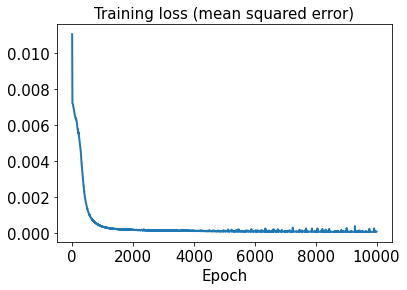

In [31]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

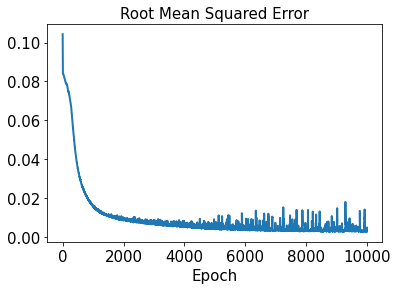

In [32]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
test_results = sd.evaluate(tsr_theta_train)

10/10 [==============================] - 0s 2ms/step - loss: 5.1530e-05 - rmse: 0.0000e+00


In [34]:
decoded_train = sd.predict(tsr_theta_train)

In [35]:
decoded_test = sd.predict(tsr_theta_test)

In [36]:
error_train_abs = np.abs(decoded_train - y_train)

In [37]:
error_test_abs = np.abs(decoded_test - y_test)

In [38]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0020130824


In [39]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.006659762


In [40]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.00097624783, 0.00090869394, 0.0020045966, 0.0014672074, 0.0010297134, 0.0011507733, 0.001119711, 0.002182037, 0.0017419963, 0.0008690591, 0.0017411863, 0.00058879895, 0.0009943835, 0.0012092466, 0.0026733947, 0.0037030214, 0.0006037, 0.001842984, 0.0017414083, 0.002793169, 0.0015853321, 0.0004557481, 0.0043103844, 0.0019133749, 0.0017064891, 0.00060485787, 0.0014929547, 0.0018377797, 0.00076501834, 0.00049934164, 0.0014149485, 0.0006135475, 0.0030508994, 0.0010832367, 0.0015351652, 0.0013101212, 0.002087491, 0.0010405879, 0.0004381565, 0.00062464736, 0.00047476875, 0.002426403, 0.00077664264, 0.00081941776, 0.0013970705, 0.0027037382, 0.0012390031, 0.002968082, 0.0008339242, 0.00216404, 0.0007519732, 0.0025008447, 0.00067681423, 0.0008570478, 0.001127943, 0.0007818625, 0.00075968675, 0.00061602116, 0.001610116, 0.0014762236, 0.0011058217, 0.002885777, 0.0014236284, 0.00057438784, 0.001137845, 0.0017726994, 0.00053633994, 0.0014023903, 0.0028098747, 0.003415064, 0.0008070384, 0.00391

In [41]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.03284635, 0.026298445, 0.0024061305, 0.0022674121, 0.0022689463, 0.063237764, 0.016219003, 0.0017792076, 0.0031879912, 0.0019079716, 0.12599704, 0.016166937, 0.0010685832, 0.0020315803, 0.00312528, 0.03889319, 0.0030883222, 0.0010897175, 0.0119365705, 0.007466314, 0.0024867768, 0.00197439, 0.0065036467, 0.0025192846, 0.0011785438, 0.0034082765, 0.004215759, 0.0049220985, 0.0021925038, 0.0038890396, 0.002016088, 0.0056122085, 0.0010947984, 0.0027093538, 0.0021917636, 0.022943366, 0.001356143, 0.0012226712, 0.001528797, 0.00235558, 0.0016603648, 0.00347068, 0.0013231537, 0.011629425, 0.0056661014, 0.0016255185, 0.0011284637, 0.012472107, 0.048234977, 0.0010093087, 0.002510767, 0.0065529044, 0.0023139531, 0.0019088383, 0.020376418, 0.0055678627, 0.0017890835, 0.021384452, 0.0047794995, 0.0013486082, 0.0019614992, 0.0016180167, 0.0016222626, 0.0054848045, 0.004770593, 0.0028018416, 0.0045703566, 0.015969474, 0.0021872956, 0.0013374123, 0.0022232463, 0.0015231337, 0.003231507, 0.00229164

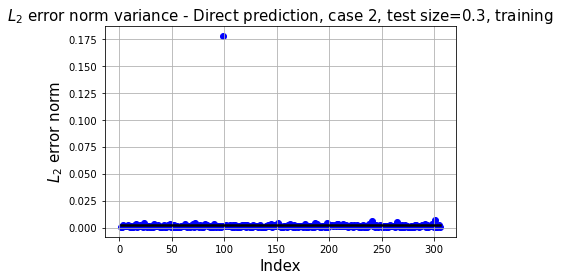

In [46]:
plt.plot(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]),
         l2_error_train*np.ones(x_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 2, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

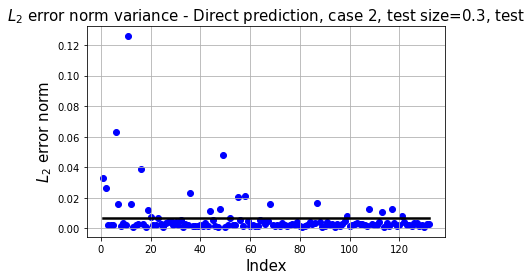

In [47]:
plt.plot(np.linspace(1, tsr_theta_test.shape[0], tsr_theta_test.shape[0]),
         l2_error_test*np.ones(tsr_theta_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], tsr_theta_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 2, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

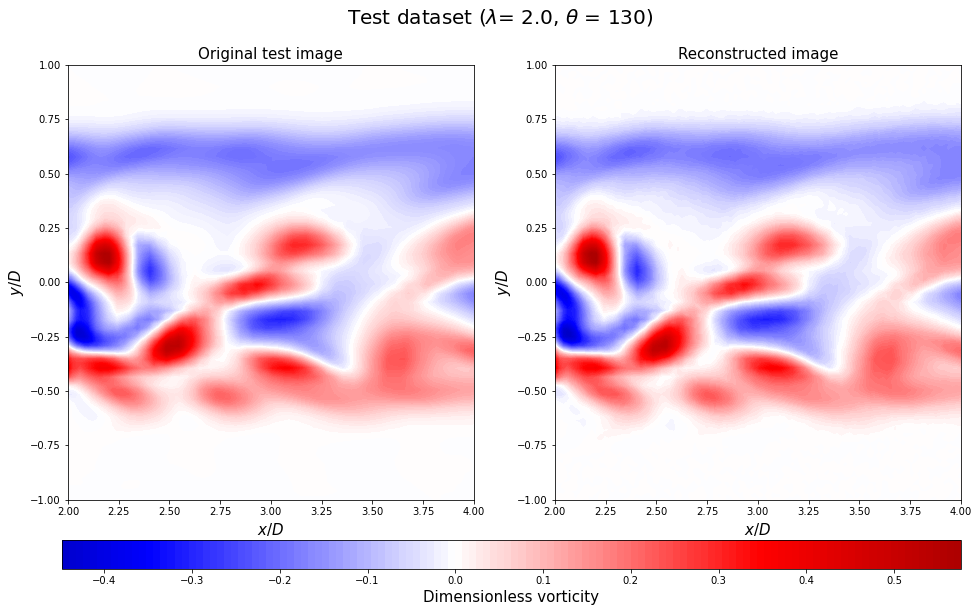

In [44]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

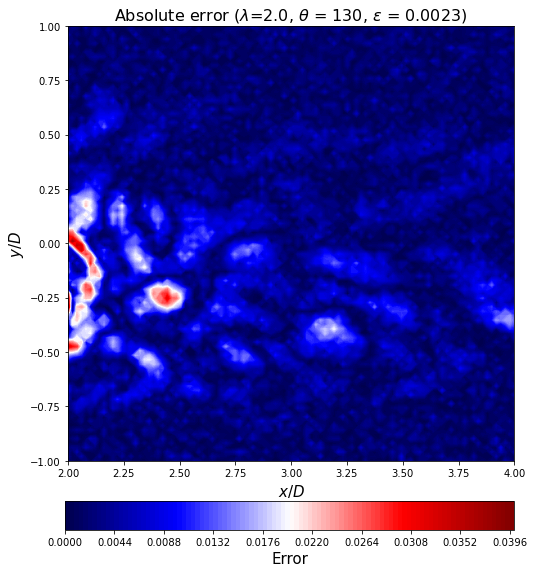

In [45]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()